In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew, kurtosis, pearsonr, spearmanr

In [3]:
male = np.loadtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skiprows=1, dtype=str)
male = male[1:].astype(float)

female = np.loadtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skiprows=1, dtype=str)
female = female[1:].astype(float)

<ipython-input-3-b14c22e8024a>:1: UserWarning: Input line 2 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  male = np.loadtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skiprows=1, dtype=str)
<ipython-input-3-b14c22e8024a>:4: UserWarning: Input line 2 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to

In [4]:
print(f"Male shape: {male.shape}, Female shape: {female.shape}")

Male shape: (4081, 7), Female shape: (4221, 7)


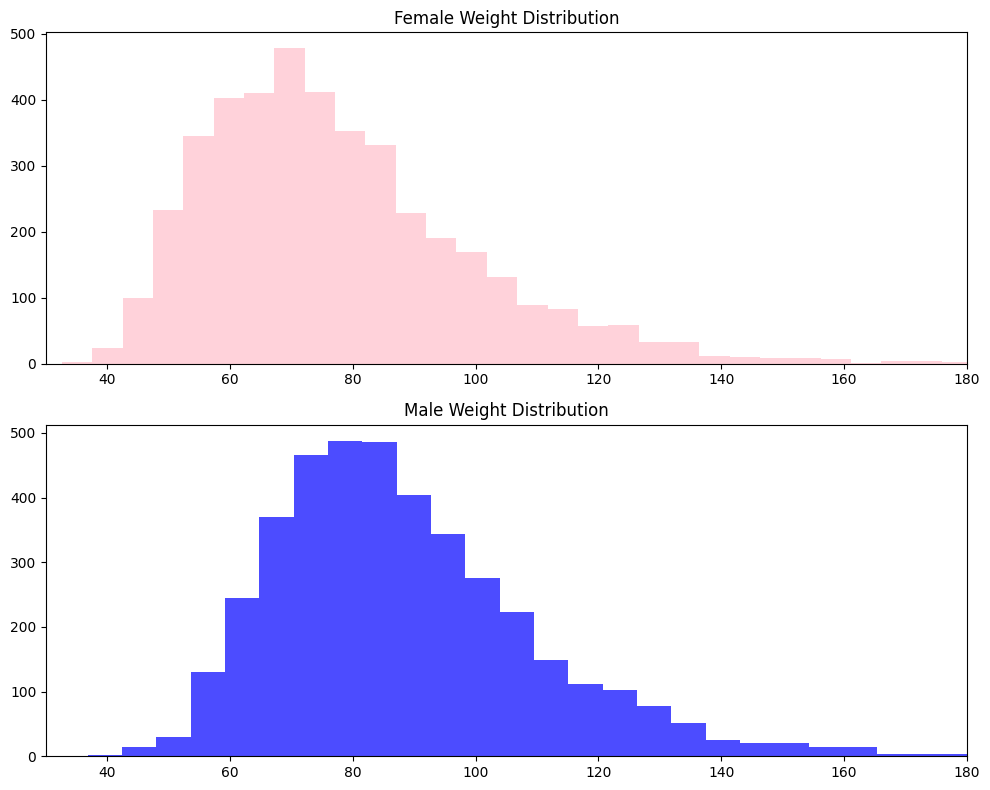

In [5]:
male_weights = male[:, 0]
female_weights = female[:, 0]

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, color='pink', alpha=0.7)
plt.title('Female Weight Distribution')
plt.xlim([30, 180])

plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, color='blue', alpha=0.7)
plt.title('Male Weight Distribution')
plt.xlim([30, 180])

plt.tight_layout()
plt.show()

<ipython-input-6-85eaa7f59bd6>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])


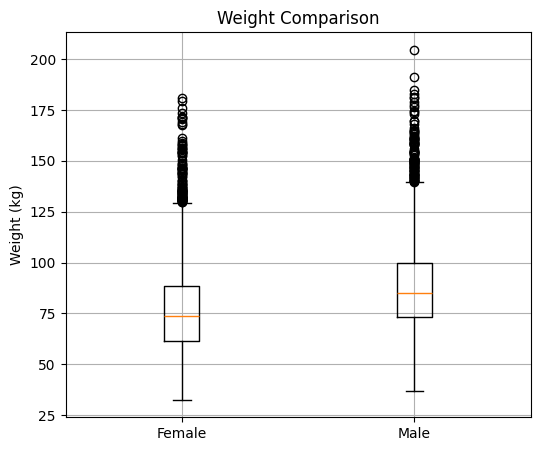

In [6]:
plt.figure(figsize=(6, 5))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title('Weight Comparison')
plt.ylabel('Weight (kg)')
plt.grid()
plt.show()


In [9]:
def describe(data, label):
    print(f"--- {label} ---")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Median: {np.median(data):.2f}")
    print(f"Std Dev: {np.std(data):.2f}")
    print(f"Min: {np.min(data)}  Max: {np.max(data)}")
    print(f"Skewness: {skew(data):.2f}")
    print(f"Kurtosis: {kurtosis(data):.2f}\n")

describe(female_weights, "Female Weights")
describe(male_weights, "Male Weights")

--- Female Weights ---
Mean: 77.40
Median: 73.60
Std Dev: 21.54
Min: 32.6  Max: 180.9
Skewness: 1.03
Kurtosis: 1.40

--- Male Weights ---
Mean: 88.36
Median: 85.00
Std Dev: 21.42
Min: 36.8  Max: 204.6
Skewness: 0.98
Kurtosis: 1.47



In [11]:
female_heights_m = female[:, 1] / 100
female_bmi = female[:, 0] / (female_heights_m ** 2)
female = np.column_stack((female, female_bmi))

In [12]:
mean_f = np.mean(female, axis=0)
std_f = np.std(female, axis=0)
zfemale = (female - mean_f) / std_f

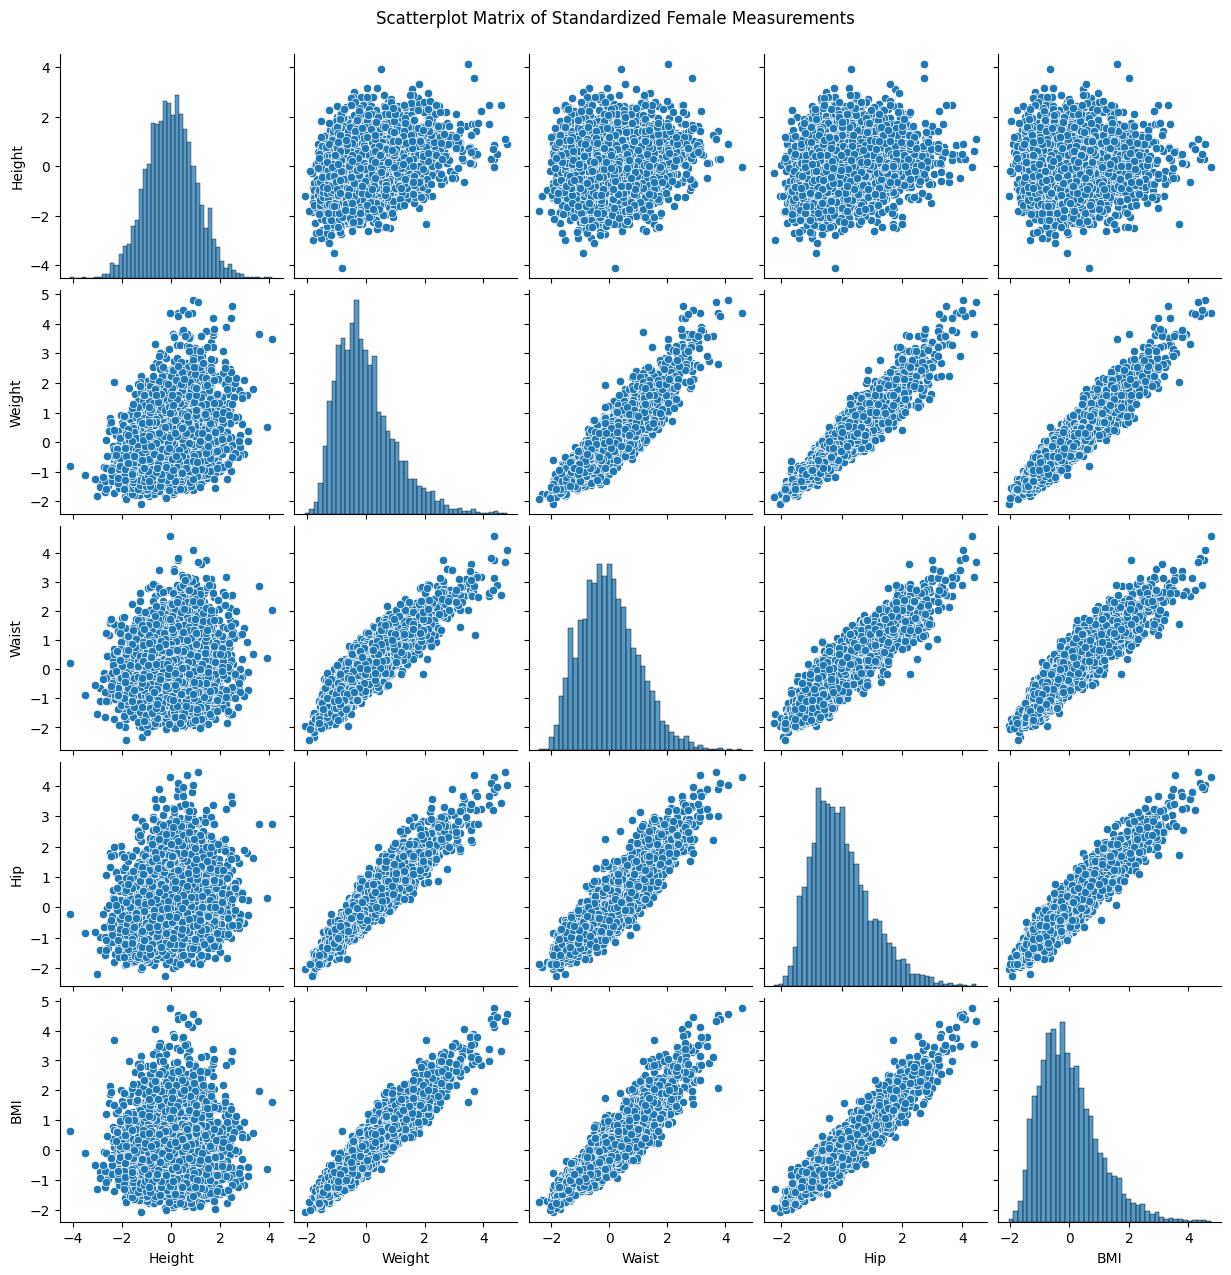

In [13]:
cols = [1, 0, 6, 5, 7]
selected_data = zfemale[:, cols]
df_selected = pd.DataFrame(selected_data, columns=["Height", "Weight", "Waist", "Hip", "BMI"])
sns.pairplot(df_selected)
plt.suptitle("Scatterplot Matrix of Standardized Female Measurements", y=1.02)
plt.show()


In [15]:
print("\nPearson Correlation:")
print(df_selected.corr(method='pearson'))
print("\nSpearman Correlation:")
print(df_selected.corr(method='spearman'))


Pearson Correlation:
          Height    Weight     Waist       Hip       BMI
Height  1.000000  0.345496  0.126547  0.202895  0.033077
Weight  0.345496  1.000000  0.904550  0.946553  0.945900
Waist   0.126547  0.904550  1.000000  0.897407  0.921198
Hip     0.202895  0.946553  0.897407  1.000000  0.944199
BMI     0.033077  0.945900  0.921198  0.944199  1.000000

Spearman Correlation:
          Height    Weight     Waist       Hip       BMI
Height  1.000000  0.338860  0.108587  0.205405  0.019897
Weight  0.338860  1.000000  0.900169  0.946634  0.937999
Waist   0.108587  0.900169  1.000000  0.888037  0.923114
Hip     0.205405  0.946634  0.888037  1.000000  0.934196
BMI     0.019897  0.937999  0.923114  0.934196  1.000000


In [16]:
male_waist_to_height = male[:, 6] / male[:, 1]
male_waist_to_hip = male[:, 6] / male[:, 5]
male = np.column_stack((male, male_waist_to_height, male_waist_to_hip))

female_waist_to_height = female[:, 6] / female[:, 1]
female_waist_to_hip = female[:, 6] / female[:, 5]
female = np.column_stack((female, female_waist_to_height, female_waist_to_hip))

<ipython-input-19-0757fc383e1d>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


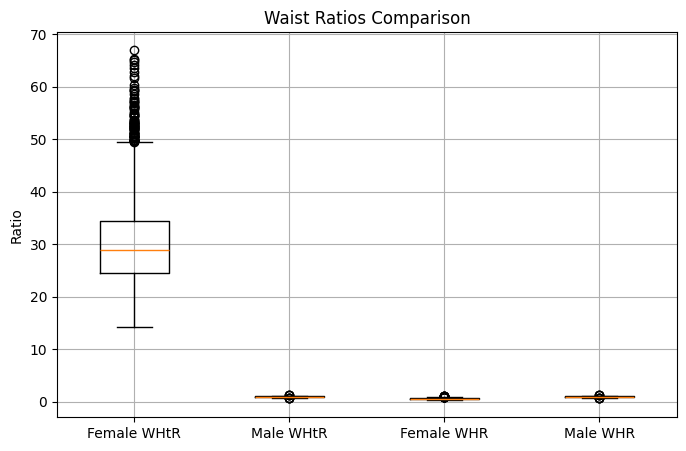

In [19]:
plt.figure(figsize=(8, 5))
plt.boxplot([
    female[:, 8], male[:, 8],  # waist-to-height
    female[:, 9], male[:, 8]   # waist-to-hip - changed male[:, 9] to male[:, 8]
], labels=['Female WHtR', 'Male WHtR', 'Female WHR', 'Male WHR'])
plt.title('Waist Ratios Comparison')
plt.ylabel('Ratio')
plt.grid()
plt.show()

In [20]:
lowest_bmi_indices = np.argsort(female[:, 7])[:5]
highest_bmi_indices = np.argsort(female[:, 7])[-5:]

print("\nLowest BMI (Standardised):")
print(zfemale[lowest_bmi_indices])

print("\nHighest BMI (Standardised):")
print(zfemale[highest_bmi_indices])


Lowest BMI (Standardised):
[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383 -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577 -1.89319577]]

Highest BMI (Standardised):
[[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.